### PCA 적용 실습
### Default of Credit card Data set -  UCI Machine Learing Repository
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Data set information
- Attribute information

    - This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
    - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
    - X2: Gender (1 = male; 2 = female).
    - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    - X4: Marital status (1 = married; 2 = single; 3 = others).
    - X5: Age (year).
    - X6 - X11(PAY Group): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
    - X12-X17(Bill_AMT Group): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
    - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
card_df = pd.read_excel('./data/credit/default of credit card clients.xls', sheet_name='Data', header=1)

In [18]:
card_df.shape

(30000, 25)

In [19]:
card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [21]:
card_df['default payment next month'].value_counts()
# 불균형 데이터셋

0    23364
1     6636
Name: default payment next month, dtype: int64

In [23]:
# 컬럼명 가공 변경
card_df.rename(
    columns={
        'PAY_0':'PAY_1'
        , 'default payment next month' : 'default'
    }, inplace=True
)
card_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [24]:
# 데이터/ 답 분리
y_target = card_df['default']
X_features = card_df.drop('default', axis =1, inplace=False)

# 데이터 구조 확인하기
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

- Null 값 없고, dtype 전부 int 로 숫자형이다.

In [25]:
# 의미없는 ID 컬럼 삭제하기
X_features.drop('ID', axis=1, inplace=True)
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

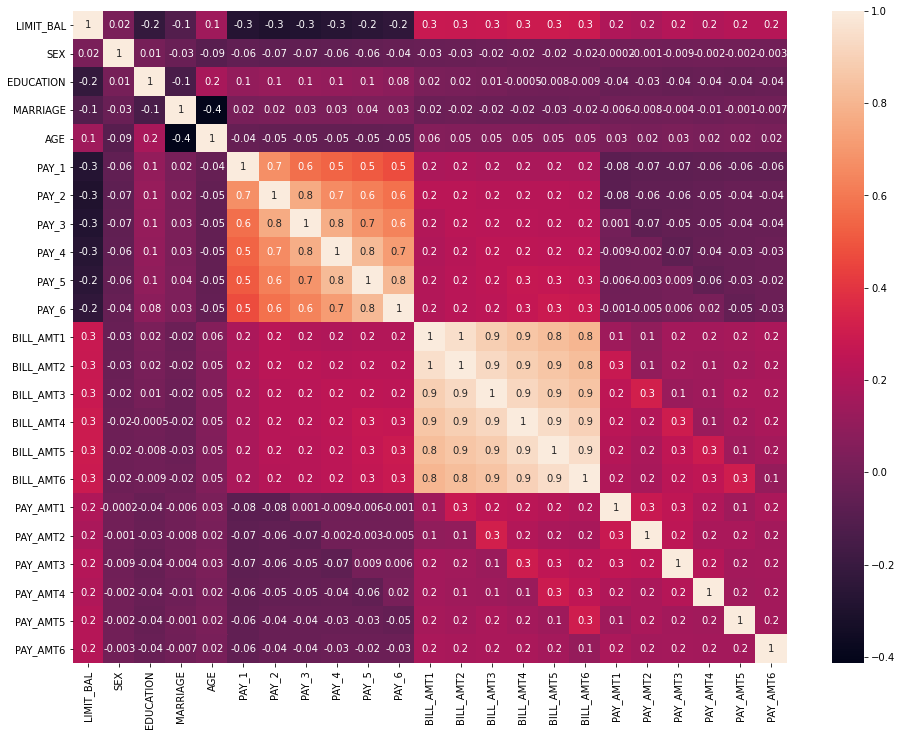

In [36]:
# 피처 간 상관관계 출력 => 관계 높은 피처들을 확인해보기
plt.figure(figsize=(16,12))
corr_ = X_features.corr()
sns.heatmap(corr_, annot=True, fmt='.1g') # fmt : 소숫점 자리 지정 

- 색이 옅은 부분이 상관계수가 높음 -> 즉 컬럼간의 상관관계가 높음
- PAY 그룹과 BILL_AMT 그룹의 연관성이 제일 높다
## PCA 는 기본적으로 공분산 즉 상관관계에 기반한 알고리즘이기 때문에, 상관계수에 따라서 컬럼을 지정해줘야 의미가 있다

- 상관계수 : 공분산을 -1 ~ 1 사이의 값으로 정규화한것

In [37]:
# 상관관계가 높은 피처들 중 BILL_AMT1 ~6(월별 사용량)을 PCA 적용해보기
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
cols_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [38]:
# 위의 6개 컬럼을 표준화한 후 2개의 성분으로 축소(차원축소)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
card_df_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(card_df_scaled)

print('변동성 : ', pca.explained_variance_ratio_)   # 공분산을 출력해줌.

변동성 :  [0.90555253 0.0509867 ]


축소되어 새롭게 출력된 2개의 피처중 첫번째 피처의 변동성이 0.9 로 매우 높다(1이최대)

### 이번에는 원본데이터 세트를 6개의 피처로 축소한 예측결과를 상호 비교해보겠다

In [39]:
# 2개의 데이터 셋을 교차검증(cv=3, RandomForrest)
# 1. PCA 처리 X
# 2. PCA 처리 O
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

# 1. PCA 처리 X
# 모델 객체 생성
rf_clf = RandomForestClassifier(
      n_estimators=300
    , random_state=156
)

scores = cross_val_score(
    rf_clf, X_features, y_target, scoring='accuracy', cv=3
)

print(scores)

[0.8083 0.8196 0.8232]


In [46]:
print('평균 정확도 ; ', np.round(np.mean(scores),4))

평균 정확도 ;  0.817


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

# 모델 객체 생성
rf_clf = RandomForestClassifier(
      n_estimators=300
    , random_state=156
)

start_time = time.time()
scores = cross_val_score(
    rf_clf, X_features, y_target, scoring='accuracy', cv=3
)

end_time = time.time()
print(scores)
print('평균 정확도 ; ', np.round(np.mean(scores),4))
print('실행시간 : ', (end_time-start_time))

[0.8083 0.8196 0.8232]
평균 정확도 ;  0.817
실행시간 :  43.36297845840454


In [48]:
# PCA 적용 : 모든 데이터 셋을 적용해서, 6개의 component로 축소

scaler = StandardScaler()
card_df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
card_df_pca = pca.fit_transform(card_df_scaled)

rf_clf = RandomForestClassifier(
      n_estimators=300
    , random_state=156
)

start_time = time.time()

card_df_scaled_pca_score= cross_val_score(
    rf_clf, card_df_pca, y_target, scoring='accuracy', cv=3
)

end_time = time.time()

In [50]:
print(card_df_scaled_pca_score)
print('평균 정확도 ; ', np.round(np.mean(card_df_scaled_pca_score),4))
print('실행시간 : ', (end_time-start_time))

[0.7912 0.7955 0.8017]
평균 정확도 ;  0.7961
실행시간 :  41.198808431625366


데이터의 75% 를 날리고도 꽤 높은 수준의 정확도를 유지한다. -> PCA 의 압축능력 확인